In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf
from sklearn import preprocessing
from skimage.transform import resize

In [2]:
cwd = os.getcwd()
os.chdir('..')
from functions import diversity_experiment_constrained_val
os.chdir(cwd)

Using TensorFlow backend.


In [3]:
# --- constants/globals --- #

# training hyperparameters
LR = .001
MOMENTUM = .9
BATCH_SIZE = 32
RUNS = 10
PATIENCE = 2

# dataset parameters
TRAIN_SIZES = [5, 10, 20, 30, 40, 50, 60, 80]
TRAIN_SIZES.reverse()
VAL_PROP = .5
SIZE = (128, 128, 3)

In [4]:
x_train = np.load('x-train.npy')
x_test = np.load('x-test.npy')

In [5]:
y_train = np.load('y-train.npy')
y_test = np.load('y-test.npy')

In [6]:
x_train_resized = []
x_test_resized = []
for image in x_train:
    new_image = resize(image, SIZE, 0)
    x_train_resized.append(new_image)
for image in x_test:
    new_image = resize(image, SIZE, 0)
    x_test_resized.append(new_image)

In [7]:
x_train = np.stack(x_train_resized, axis=0)
x_test = np.stack(x_test_resized, axis=0)

In [8]:
le = preprocessing.LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [9]:
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)

In [10]:
gist_train = np.load('gist-train.npy')

In [11]:
# ind = np.arange(x_train.shape[0])
# np.random.shuffle(ind)
# x_train = x_train[ind]
# y_train = y_train[ind]
# gist_train = gist_train[ind]

In [12]:
x_train = x_train * 255
x_test = x_test * 255
# x_train = x_train.astype('uint8')
# x_test = x_test.astype('uint8')

In [13]:
# perform experiment
results_df = diversity_experiment_constrained_val(x_train, y_train, 
                                                  gist_train, 
                                                  x_test, y_test, 
                                                  train_sizes=TRAIN_SIZES,
                                                  val_prop=VAL_PROP,
                                                  runs=RUNS,
                                                  lr=LR, momentum=MOMENTUM, 
                                                  batch_size=BATCH_SIZE,
                                                  patience=PATIENCE,
                                                  verbose=0)

performing experiment for train size = 80
performing experiment for train size = 60
performing experiment for train size = 50
performing experiment for train size = 40
performing experiment for train size = 30
performing experiment for train size = 20
performing experiment for train size = 10
performing experiment for train size = 5


In [14]:
results_df.to_csv('8scenes-results.csv')

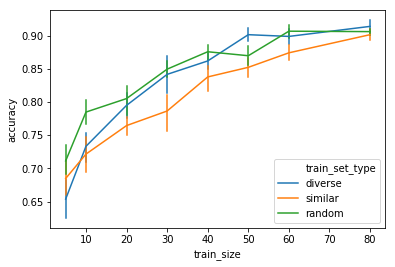

In [15]:
sns.lineplot(data=results_df, 
             x='train_size', y='accuracy', hue='train_set_type',
             err_style='bars')